<a href="https://colab.research.google.com/github/JadeSCLim/fistRep/blob/master/goog_30days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program predicts the price of GOOG Stock for a specific day
#              using the Machine Learning algorithm called Support Vector Rgression (SVR)
#              & Linear Regression

In [0]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [0]:
#Load the data
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('GOOG_30_day.csv')
df.head(7)

Saving GOOG_30_day.csv to GOOG_30_day.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,18/11/2019,1332.219971,1335.529053,1317.500000,1320.699951,1320.699951,1487400
1,19/11/2019,1327.699951,1327.699951,1312.800049,1315.459961,1315.459961,1269200
2,20/11/2019,1311.739990,1315.000000,1291.150024,1303.050049,1303.050049,1308600
3,21/11/2019,1301.479980,1312.589966,1293.000000,1301.349976,1301.349976,995500
4,22/11/2019,1305.619995,1308.729980,1291.410034,1295.339966,1295.339966,1385700
5,25/11/2019,1299.180054,1311.310059,1298.130005,1306.689941,1306.689941,1036200
6,26/11/2019,1309.859985,1314.800049,1305.089966,1313.550049,1313.550049,1069700


In [0]:
#Create the lists / X and Y data sets
dates =[]
prices = []

In [0]:
#Get the number of rows and columns in the data set
df.shape

(21, 7)

In [0]:
#Get the last row of data (this will be the data that we test on)
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
20,17/12/2019,1362.890015,1365.0,1351.322998,1355.119995,1355.119995,1854000


In [0]:
#Get all of the data except for the last row
df=df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,18/11/2019,1332.219971,1335.529053,1317.500000,1320.699951,1320.699951,1487400
1,19/11/2019,1327.699951,1327.699951,1312.800049,1315.459961,1315.459961,1269200
2,20/11/2019,1311.739990,1315.000000,1291.150024,1303.050049,1303.050049,1308600
3,21/11/2019,1301.479980,1312.589966,1293.000000,1301.349976,1301.349976,995500
4,22/11/2019,1305.619995,1308.729980,1291.410034,1295.339966,1295.339966,1385700
5,25/11/2019,1299.180054,1311.310059,1298.130005,1306.689941,1306.689941,1036200
6,26/11/2019,1309.859985,1314.800049,1305.089966,1313.550049,1313.550049,1069700
7,27/11/2019,1315.000000,1318.359985,1309.630005,1312.989990,1312.989990,995600
8,29/11/2019,1307.119995,1310.204956,1303.969971,1304.959961,1304.959961,587000
9,02/12/2019,1301.000000,1305.829956,1281.000000,1289.920044,1289.920044,1510900


In [0]:
# Print new data shape
df.shape

(20, 7)

In [0]:
#Get all of the rows from the Date Column
df_dates = df.loc[:, 'Date']
#Get all of the rows from the Date Column
df_open = df.loc[:,'Open']

In [0]:
ni=int(date.split('/')[0])
print(ni)

NameError: ignored

In [0]:
#Create the independent data set X
for date in df_dates:
  dates.append([int(date.split('/')[0])])

#Create the dependent data set 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [0]:
#Check what days were recorded
print(dates)

[[18], [19], [20], [21], [22], [25], [26], [27], [29], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16]]


In [0]:
#Create a predict function
def predict_prices(dates,prices,x):
  #Create the 3 Support Vector Regression models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

  #Train the SVR models
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)

  #Create the Linear regression model
  lin_reg = LinearRegression()
  #Train the Linear Regression Model
  lin_reg.fit(dates,prices)

  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates,prices,color='black',label='Data')
  plt.plot(dates, svr_rbf.predict(dates),color='red',label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates),color='blue',label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates),color='green',label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates),color='orange',label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()

  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0], lin_reg.predict(x)[0]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


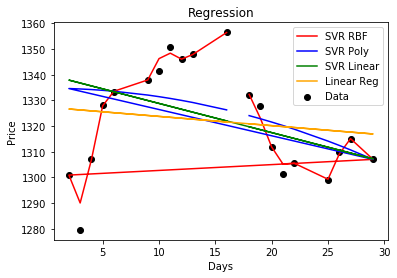

(1342.9568848970484, 1320.8477929130129, 1325.2051008158296, 1321.230549434156)


In [0]:
#Predict the price of GOOG on day 17
predicted_price = predict_prices(dates,prices,[[17]])
print(predicted_price)